In [1]:
import os
import imageio.v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow import keras
from scipy import misc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
train_path = 'Training'
test_path = 'Testing'


data1 = []
y1 = []


for r, d, f in os.walk(train_path):
    for file in f:
        if '.jpg' in file:
          
            path = os.path.join(r, file)
            
            if 'glioma_tumor' in r:
                y1.append(3)
            elif 'meningioma_tumor' in r:
                y1.append(2)
            elif 'pituitary_tumor' in r:
                y1.append(1)
            elif 'no_tumor' in r:
                y1.append(0)
            
            img = Image.open(path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data1.append(np.array(img))


for r, d, f in os.walk(test_path):
    for file in f:
        if '.jpg' in file:
            
            path = os.path.join(r, file)
            
            if 'glioma_tumor' in r:
                y1.append(3)
            elif 'meningioma_tumor' in r:
                y1.append(2)
            elif 'pituitary_tumor' in r:
                y1.append(1)
            elif 'no_tumor' in r:
                y1.append(0)
            
            img = Image.open(path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data1.append(np.array(img))

In [3]:
data1 = np.array(data1)
y1 = np.array(y1)
y1 = np_utils.to_categorical(y1)
print(data1.shape)
print(y1.shape)

(3264, 128, 128, 3)
(3264, 4)


In [5]:
data1= data1.astype('float32')
data1/=255

AxesImage(80,52.8;496x369.6)


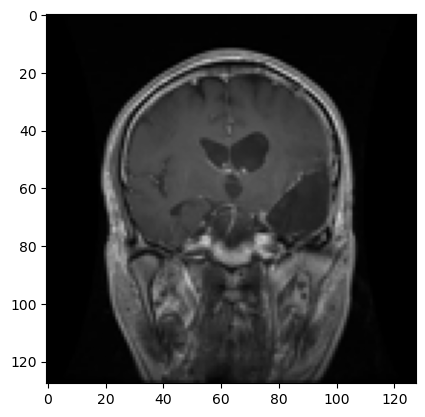

In [7]:
print(plt.imshow(data1[243]))

In [8]:
train_x, test_x,train_y, test_y = train_test_split(data1, y1, test_size= 0.2 , shuffle = True, random_state = 42)

In [9]:
model1 = Sequential()

model1.add(Conv2D(32, (2, 2), padding='same', input_shape=(128,128,3)))
model1.add(Activation('relu'))


model1.add(Conv2D(32, (2, 2)))
model1.add(Activation('relu'))


model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Dropout(0.2))


model1.add(Conv2D(128, (2, 2), padding='same'))
model1.add(Activation('relu'))


model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))


model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Dropout(0.25))


model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation('relu'))


model1.add(Dropout(0.5))


model1.add(Dense(64))
model1.add(Activation('relu'))


model1.add(Dense(4, Activation('softmax')))

In [10]:
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4128      
                                                                 
 activation_1 (Activation)   (None, 127, 127, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                        

In [11]:
opt1 = Adam(learning_rate=0.0001) 
model1.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])


history1 = model1.fit(train_x, train_y, batch_size=50, epochs=15, validation_data=(test_x, test_y), verbose=1)

Epoch 1/15
53/53 [==============================] - 59s 1s/step - loss: 1.3034 - accuracy: 0.4048 - val_loss: 1.2176 - val_accuracy: 0.5069
Epoch 2/15
53/53 [==============================] - 58s 1s/step - loss: 1.1866 - accuracy: 0.4994 - val_loss: 1.0917 - val_accuracy: 0.5835
Epoch 3/15
53/53 [==============================] - 59s 1s/step - loss: 1.0547 - accuracy: 0.5630 - val_loss: 0.9503 - val_accuracy: 0.6187
Epoch 4/15
53/53 [==============================] - 56s 1s/step - loss: 0.9759 - accuracy: 0.5776 - val_loss: 0.9192 - val_accuracy: 0.6141
Epoch 5/15
53/53 [==============================] - 56s 1s/step - loss: 0.8659 - accuracy: 0.6453 - val_loss: 0.8323 - val_accuracy: 0.6386
Epoch 6/15
53/53 [==============================] - 57s 1s/step - loss: 0.8070 - accuracy: 0.6645 - val_loss: 0.7891 - val_accuracy: 0.6646
Epoch 7/15
53/53 [==============================] - 59s 1s/step - loss: 0.7341 - accuracy: 0.6955 - val_loss: 0.6972 - val_accuracy: 0.7014
Epoch 8/15
53/53 [==

In [17]:
loss1, accuracy1 = model1.evaluate(test_x, test_y)
print('Testing loss:', loss)
print('Testing accuracy:', accuracy)

21/21 [==============================] - 2s 118ms/step - loss: 0.5158 - accuracy: 0.7979
Testing loss: 0.5157783627510071
Testing accuracy: 0.7978560328483582


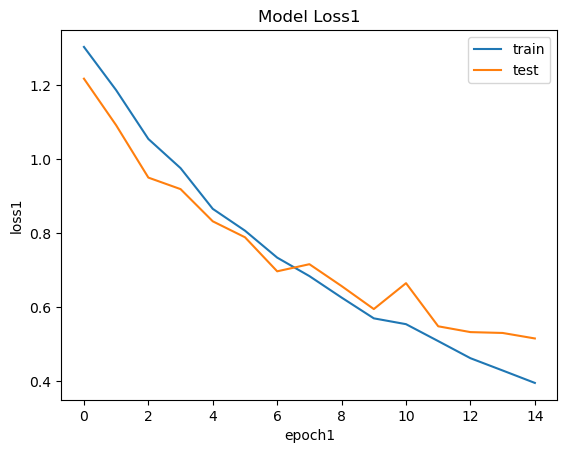

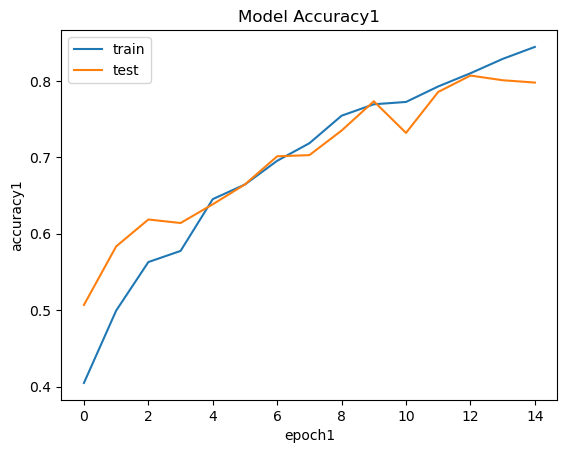

In [19]:
import matplotlib.pyplot as plt


plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.title('Model Loss1')
plt.ylabel('loss1')
plt.xlabel('epoch1')
plt.legend()
plt.show()


plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.title('Model Accuracy1')
plt.ylabel('accuracy1')
plt.xlabel('epoch1')
plt.legend()
plt.show()